In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pandas as pd
import numpy as np
import math

In [2]:
def logistic_runner(x,y,a,b,m,iterate):
    new_m=m
    new_b=b
    for i in range(iterate):
        [new_b,new_m]=gradient_ascent_algorithm(x,y,a,new_b,new_m)
    return [new_b,new_m]

In [3]:
def gradient_ascent_algorithm(x,y,a,b,m):
    new_m=np.array([0.0,0.0,0.0,0.0,0.0])
    new_b=0
    new_m1=np.array([])
    n=float(len(x))
    for i in range(len(x)):
        k=x[i]
        s=0
        new_b+=(1/n)*(y[i]-logisticfunction(k,b,m))
        for j in range(len(x[i])):
            h=x[i][j]
            new_m[j]=new_m[j]+(1/n)*h*(y[i]-logisticfunction(k,b,m))
    m1=m+(a*new_m)
    b1=b+(a*new_b)
    return [b1,m1]


In [4]:
def logisticfunction(x,b,m):
    c=x*m
    s=(b+sum(c))
    y=1.0/(1.0+math.exp(-s))
    return y

In [5]:
def postlogisticfunction(x,b,m):   #Using Digression ie forcing the value to output either 1 or 0
    c=x*m
    s=(b+sum(c))
    if s>=0.0:
        return 1
    else:
        return 0
 

In [6]:
def predict(x,b,m):#Predicter Function
    y=[]
    for i in range(len(x)):
        k=postlogisticfunction(x[i],b,m)
        y.append(k)
    return y
        

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


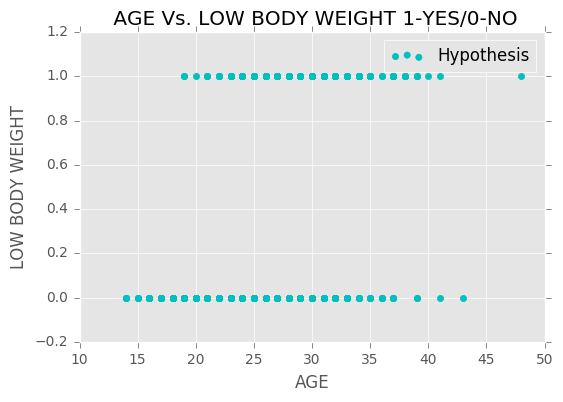

In [7]:
def run():
    a=0.0001#learning_rate
    initial_b = 1.0 # initial theta 0
    initial_m =np.array([1.0,1.0,1.0,1.0,1.0])# rest of the theta
    linear_train = pd.read_excel("clslowbwt.xls")
    x=np.array(linear_train[["BIRTH","SMOKE","RACE","AGE","LWT"]])
    y=np.array(linear_train["LOW"])
    x1=np.array(linear_train["AGE"])
    iteration=1000
    [b,m]=logistic_runner(x,y,a,initial_b,initial_m,iteration)
    k=predict(x,b,m)
    plt.xlabel('AGE')
    plt.ylabel('LOW BODY WEIGHT')
    plt.title(' AGE Vs. LOW BODY WEIGHT 1-YES/0-NO')
    plt.scatter(x1,k,color='c',label="Hypothesis")
    plt.legend()
    plt.show()


   #DataSet https://www.umass.edu/statdata/statdata/stat-logistic.html

if __name__ == '__main__':
    run()
